In [1]:
from numpy import array

In [2]:
anisotropy_row = array([0.203, 0.207, 0.191, 0.142, 0.105, 0.084, 0.075, 0.080, 0.085, 0.072, 0.078])
arp23_concentration_row = array([3860, 1930, 965, 483, 241, 121, 60, 30, 15, 8, 0]) / 1000.0

In [3]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [4]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [5]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return anisotropy

def dna_anisotropy_hill(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy, n):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration**n + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration**n + 0.010)**2 - 
                                            4 * arp23_concentration**n * 0.010)) / 0.010
    return anisotropy

In [6]:
p2opt, p2cov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2])
p3opt, p3cov = curve_fit(dna_anisotropy_hill, arp23_concentration_row, anisotropy_row, p0 = [0.5, 0.07, 0.2, 1.0])

/home/jiongyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,0,'Arp2/3 complex ($\\mu$M)')

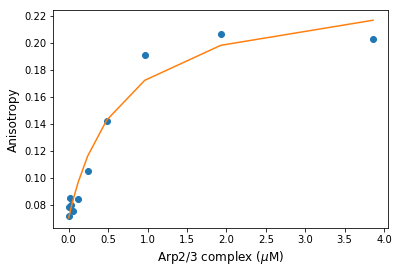

In [7]:
figure_handle, axes_handle = subplots()
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy(arp23_concentration_row, *p2opt))
axes_handle.set_ylabel(r'Anisotropy', fontsize = 12)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 12)

In [8]:
from numpy import diag
variance_row = sqrt(diag(p2cov))
print(p2opt)
print(variance_row)

[0.65165976 0.07023734 0.24167854]
[0.22535127 0.00607717 0.01807918]


Text(0.5,0,'Arp2/3 complex ($\\mu$M)')

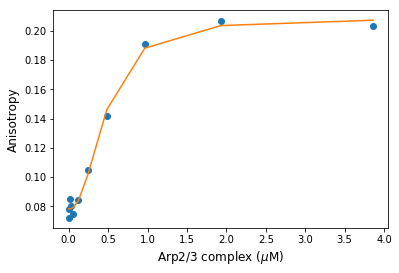

In [9]:
figure_handle, axes_handle = subplots()
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy_hill(arp23_concentration_row, *p3opt))
axes_handle.set_ylabel(r'Anisotropy', fontsize = 12)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 12)

In [10]:
print(p3opt)
print(sqrt(diag(p3cov)))

[0.16662772 0.07816382 0.20823396 2.30631635]
[0.05408037 0.00221508 0.00432309 0.31461188]
